# Basic (Units and Constants)

In [1]:
%matplotlib inline

In [2]:
from astropy import constants as const
from astropy import units as u

In [3]:
print(u.eV.to(u.erg))

print((1*u.Jy).cgs.value)

1.6021766339999997e-12
1.0000000000000003e-23


In [4]:
print(const.c)

print(const.c.cgs)

print(const.c.to('km/s'))
print(const.c.to('pc/yr'))

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018
29979245800.0 cm / s
299792.458 km / s
0.3066013937879528 pc / yr


In [5]:
?const

Type:        module
String form: <module 'astropy.constants' from '/Users/astrodoo/opt/anaconda3/lib/python3.8/site-packages/astropy/constants/__init__.py'>
File:        ~/opt/anaconda3/lib/python3.8/site-packages/astropy/constants/__init__.py
Docstring:  
Contains astronomical and physical constants for use in Astropy or other
places.

A typical use case might be::

    >>> from astropy.constants import c, m_e
    >>> # ... define the mass of something you want the rest energy of as m ...
    >>> m = m_e
    >>> E = m * c**2
    >>> E.to('MeV')  # doctest: +FLOAT_CMP
    <Quantity 0.510998927603161 MeV>

The following constants are available:

========== ============== ================ =========================
   Name        Value            Unit       Description
========== ============== ================ =========================
    G        6.6743e-11     m3 / (kg s2)   Gravitational constant
   N_A     6.02214076e+23    1 / (mol)     Avogadro's number
    R        8.31446262    

In [6]:
F = (const.G.cgs * 3.*const.M_sun.cgs* 100* u.kg) / (2.2*u.au)**2
print(F)

print(F.to(u.dyne))
print(F.to(u.N))

8.225977685950412e+27 cm3 kg / (AU2 s2)
36756.71602160826 dyn
0.3675671602160827 N


In [7]:
a = 42.*u.cm

print(a.value)
print(a.unit)

x = 1.*u.pc
print(x.to(u.km))

42.0
cm
30856775814671.914 km


In [8]:
""" create custom units """

cms = u.cm / u.s
mph = u.imperial.mile / u.hour

q = 42.*cms

print(q)
print(q.to(mph))

42.0 cm / s
0.939513242662849 mi / h


In [9]:
print(1100.1*u.m + 13.5*u.km)
print(13.5*u.km + 1100.1*u.m)

14600.1 m
14.6001 km


In [10]:
import numpy as np

print(np.sin(30.*u.deg))

print(np.sin(np.pi/6.))

0.49999999999999994
0.49999999999999994


In [11]:
""" dimensionless quantitites """
nu = 3.*u.GHz
T  = 30.*u.K

print(np.exp(-const.h * nu / (const.k_B * T)))

nu2 = 3.e9*u.Hz
print(np.exp(-const.h * nu2 / (const.k_B * T)))

0.9952122548924741
0.9952122548924741


In [12]:
a = 1. + 1.*u.m/u.km
print(a)

b = 1.+(1.*u.m/u.km).value
print(b)

c = (1.*u.m/u.km)
print(c)
print(c.unit)
print(c.unit.decompose())

1.001
2.0
1.0 m / km
m / km
0.001


In [13]:
print(u.dimensionless_unscaled == u.Unit(''))

True


In [14]:
print(u.g.find_equivalent_units())

  Primary name | Unit definition | Aliases                         
[
  M_e          | 9.10938e-31 kg  |                                  ,
  M_p          | 1.67262e-27 kg  |                                  ,
  earthMass    | 5.97217e+24 kg  | M_earth, Mearth                  ,
  g            | 0.001 kg        | gram                             ,
  jupiterMass  | 1.89812e+27 kg  | M_jup, Mjup, M_jupiter, Mjupiter ,
  kg           | irreducible     | kilogram                         ,
  solMass      | 1.98841e+30 kg  | M_sun, Msun                      ,
  t            | 1000 kg         | tonne                            ,
  u            | 1.66054e-27 kg  | Da, Dalton                       ,
]


# decomposing and composing units

In [16]:
print((u.km / u.m).decompose())
print((u.km / u.m).physical_type)

1000
dimensionless


In [17]:
print(u.Ry)

print(u.Ry.decompose(bases = u.cgs.bases))

Ry
2.17987e-11 cm2 g / s2


In [18]:
x = u.Ry.decompose()

print(x.compose())

[Unit("Ry"), Unit("2.17987e-18 J"), Unit("2.17987e-11 erg"), Unit("13.6057 eV")]


In [19]:
""" compound units """
(u.s**-1).compose()

[Unit("Bq"), Unit("Hz"), Unit("2.7027e-11 Ci")]

In [20]:
(u.s**-1).compose(equivalencies=u.spectral())

[Unit("Bq"),
 Unit("Hz"),
 Unit("6.62607e-34 J"),
 Unit("6.62607e-27 erg"),
 Unit("3.03966e-16 Ry"),
 Unit("4.13567e-15 eV"),
 Unit("2.7027e-11 Ci"),
 Unit("3.33564e-11 k"),
 Unit("9.71561e-09 pc"),
 Unit("3.16881e-08 lyr"),
 Unit("0.00200399 AU"),
 Unit("0.430922 solRad"),
 Unit("4.19337 jupiterRad"),
 Unit("47.0034 earthRad"),
 Unit("2.99792e+08 m"),
 Unit("2.99792e+10 cm"),
 Unit("2.99792e+14 micron"),
 Unit("2.99792e+18 Angstrom"),
 Unit("2.99792e+06 k m2"),
 Unit("3.33564e-09 / m"),
 Unit("3.50331e-42 pc2 / m3"),
 Unit("3.72675e-41 lyr2 / m3"),
 Unit("1.49049e-31 AU2 / m3"),
 Unit("6.89184e-27 solRad2 / m3"),
 Unit("6.52626e-25 jupiterRad2 / m3"),
 Unit("8.19968e-23 earthRad2 / m3"),
 Unit("3.33564e-05 cm2 / m3"),
 Unit("3335.64 micron2 / m3"),
 Unit("3.33564e+11 Angstrom2 / m3")]

In [21]:
""" Temperature Energy Equivalency """

t_k = 1.e6*u.K

print(t_k.to(u.eV, equivalencies = u.temperature_energy()))

86.17333262145178 eV


In [22]:
u.Hz.find_equivalent_units()

Primary name,Unit definition,Aliases
Bq,1 / s,becquerel
Ci,3.7e+10 / s,curie
Hz,1 / s,"Hertz, hertz"


In [23]:
u.Hz.find_equivalent_units(equivalencies=u.spectral())

Primary name,Unit definition,Aliases
AU,1.49598e+11 m,"au, astronomical_unit"
Angstrom,1e-10 m,"AA, angstrom"
Bq,1 / s,becquerel
Ci,3.7e+10 / s,curie
Hz,1 / s,"Hertz, hertz"
J,kg m2 / s2,"Joule, joule"
Ry,2.17987e-18 kg m2 / s2,rydberg
cm,0.01 m,centimeter
eV,1.60218e-19 kg m2 / s2,electronvolt
earthRad,6.3781e+06 m,"R_earth, Rearth"


In [24]:
print (u.m.is_equivalent(u.pc))
print ((u.m**3).is_equivalent(u.l))

True
True


# Models and Fitting

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
    amplitude mean stddev
    --------- ---- ------
          1.2  0.9    0.5
Parameter('amplitude', value=1.2)
Parameter('mean', value=0.9)
Parameter('stddev', value=0.5, bounds=(1.1754943508222875e-38, None))
0.3336447605438329
[0.87137884 1.07619607 1.1893806  1.17623841 1.04091417 0.82428907
 0.58410271]


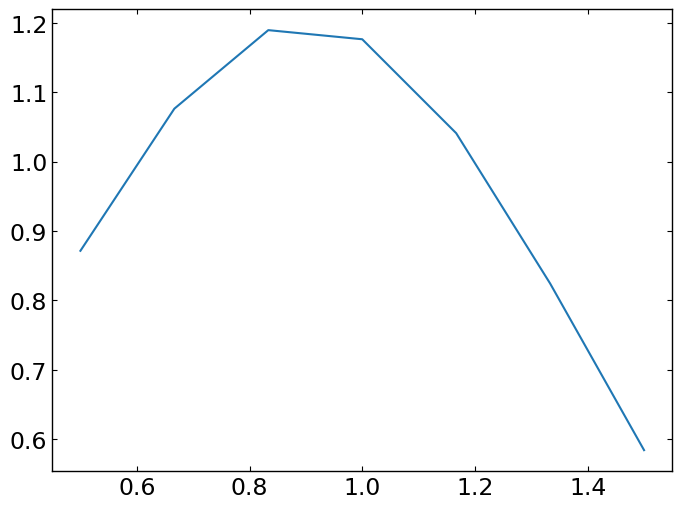

In [26]:
from astropy.modeling import models
import numpy as np
import matplotlib.pyplot as plt

g = models.Gaussian1D(amplitude=1.2, mean=0.9, stddev=0.5)

print (g)

print(g.amplitude)
print(g.mean)
print(g.stddev)

print(g(0.1))

x = np.linspace(0.5,1.5,7)
y = g(x)
print(y)

plt.plot(x,y)
plt.show()

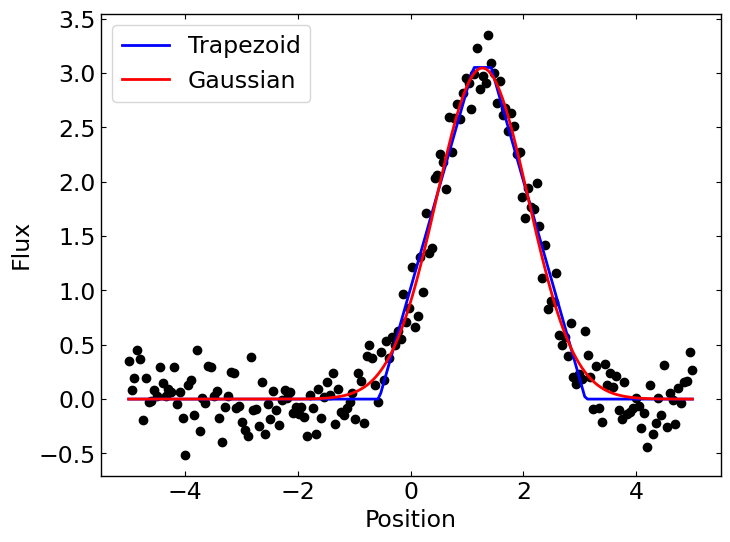

In [27]:
import numpy as np
from astropy.modeling import models, fitting
import matplotlib.pyplot as plt

# Generate face data
np.random.seed(0)
x = np.linspace(-5.,5.,200)
y = 3*np.exp(-0.5*(x-1.3)**2 / 0.8**2)
y += np.random.normal(0., 0.2, x.shape)

# Fit the data using a box model
t_init = models.Trapezoid1D(amplitude=1., x_0=0., width=1., slope=0.5)
fit_t = fitting.LevMarLSQFitter()
t = fit_t(t_init, x, y)

# Fit the data using a Gaussian
g_init = models.Gaussian1D(amplitude=1., mean=0., stddev=1.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x, y)

# Plot the data with the best-fit model
# plt.figure(figsize=(8,5))
plt.plot(x, y, 'ko')
plt.plot(x, t(x), 'b-', lw=2, label='Trapezoid')
plt.plot(x, g(x), 'r-', lw=2, label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2, fontsize='medium')
plt.show()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 6.832859352651128
            Iterations: 15
            Function evaluations: 128
            Gradient evaluations: 15


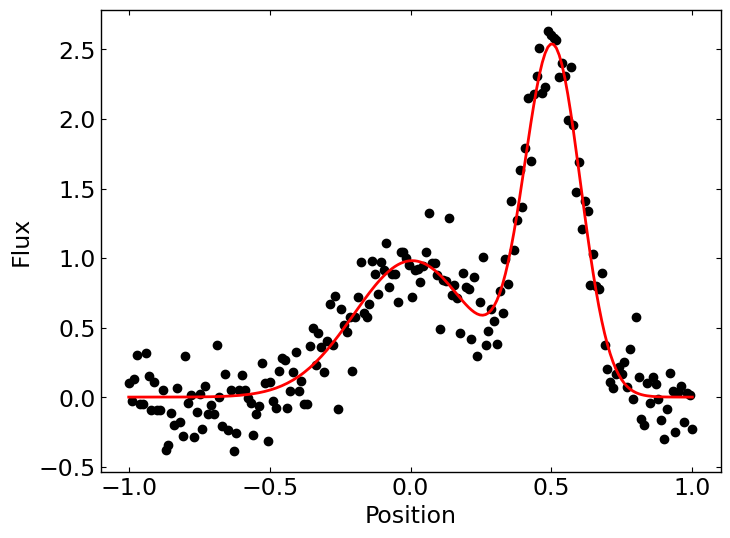

In [28]:
import numpy as np
from astropy.modeling import models, fitting
import matplotlib.pyplot as plt

# Generate fake data
np.random.seed(42)
g1 = models.Gaussian1D(1, 0, 0.2)
g2 = models.Gaussian1D(2.5, 0.5, 0.1)
x = np.linspace(-1, 1, 200)
y = g1(x) + g2(x) + np.random.normal(0., 0.2, x.shape)

# Now to fit the data create a new superposition with initial
# guesses for the parameters:
gg_init = models.Gaussian1D(1, 0, 0.1) + models.Gaussian1D(2, 0.5, 0.1)
fitter = fitting.SLSQPLSQFitter()
gg_fit = fitter(gg_init, x, y)

# Plot the data with the best-fit model
#plt.figure(figsize=(8,5))
plt.plot(x, y, 'ko')
plt.plot(x, gg_fit(x), 'r-', lw=2)
plt.xlabel('Position')
plt.ylabel('Flux')
plt.show()